In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('patient_heart_rate.csv', header=0)
df.head(5)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


In [15]:
df[['Firstname', 'Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name', axis=1)

In [16]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [17]:
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        y = int(float_x/2.2)
        weight[i]=y
    if 'kgs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        weight[i]= x

C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\2860595133.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]= x
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\2860595133.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=y
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\2860595133.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]= x
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\2860595133.py:

In [18]:
df.rename(columns={'Weight': 'Weight_kgs'}, inplace=True)

In [19]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [20]:
df.dropna(how='all', inplace=True)

In [21]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [22]:
df =df.drop_duplicates(subset=['Firstname', 'Lastname', 'Age', 'Weight_kgs'])

In [23]:
df.Firstname.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\1126816188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\1126816188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [26]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [27]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [28]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\1979542691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


In [29]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [31]:
df = pd.melt(df, id_vars=['Id','Age', 'Weight_kgs', 'Firstname', 'Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'])

In [32]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-
41,15.0,52.0,81,NaN,NaN,m1218,-
55,15.0,52.0,81,NaN,NaN,f0006,68
69,15.0,52.0,81,NaN,NaN,f0612,75


In [35]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\4239365344.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)
C:\Users\DUONG\AppData\Local\Temp\ipykernel_2864\4239365344.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_temp.colums = ['Gender', 'Lower_hour', 'Upper_hour']


,0,1,2
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [36]:
df = pd.concat([df, df_temp], axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,0,1,2
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12
...,...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-,m,06,12
41,15.0,52.0,81,NaN,NaN,m1218,-,m,12,18
55,15.0,52.0,81,NaN,NaN,f0006,68,f,00,06
69,15.0,52.0,81,NaN,NaN,f0612,75,f,06,12


In [37]:
df = df.drop(['gender_time'], axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,0,1,2
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


In [40]:
df.columns = ['Id','Age','Weight_kgs', 'Firstname', 'Lastname', 'PulseRate','Gender', 'Lower_hour', 'Upper_hour']


In [41]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


In [42]:
df =df.replace('-', np.nan).dropna(subset=['PulseRate'])
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12


In [47]:
df['Firstname'].isnull().sum()
df['Lastname'].isnull().sum()

3

In [49]:
df['Firstname'].fillna('Unknown', inplace=True)
df['Lastname'].fillna('Unknown', inplace=True)

In [50]:
df = df.reset_index()

In [51]:
df.to_csv('patient_heart_rate_clean.csv')

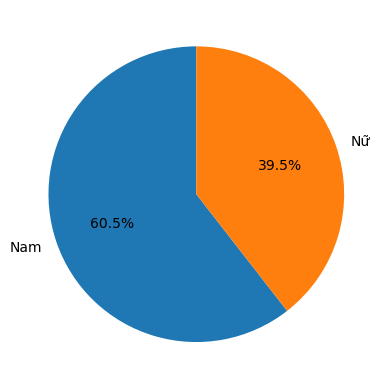

In [62]:
# Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ
plt.pie(df['Gender'].value_counts(), labels =['Nam', 'Nữ'], autopct='%1.1f%%', startangle=90)
plt.show()


In [64]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
df.head(5)

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06,Micky Mous
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12,Micky Mous
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18,Micky Mous
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06,Donald Duck
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12,Donald Duck


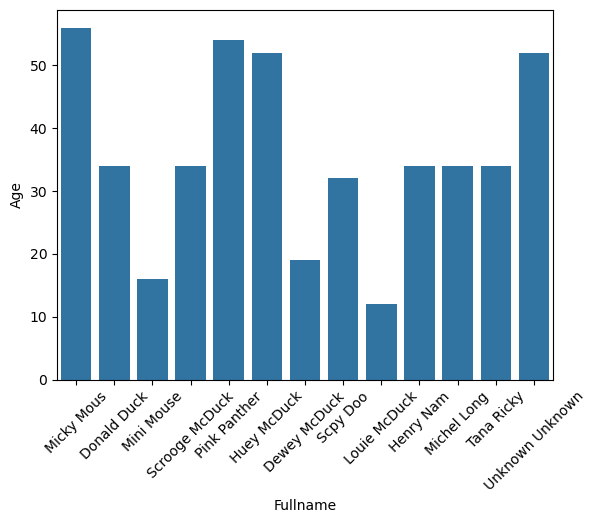

In [69]:
#  Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân
sns.barplot(x='Fullname', y='Age', data=df)
plt.xticks(rotation=45)
plt.show()

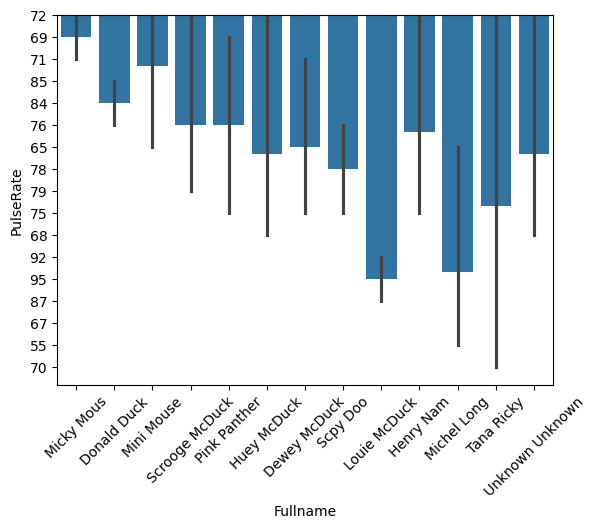

In [72]:
# Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân
sns.barplot(x='Fullname', y='PulseRate', data=df)
plt.xticks(rotation=45)
plt.show()


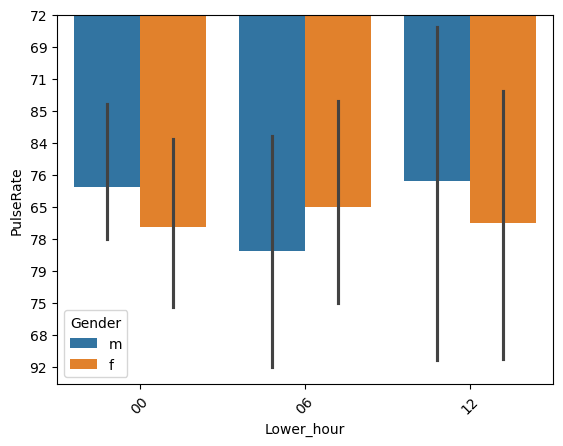

In [71]:
# Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính
sns.barplot(x='Lower_hour', y='PulseRate', data=df, hue='Gender')
plt.xticks(rotation=45)
plt.show()

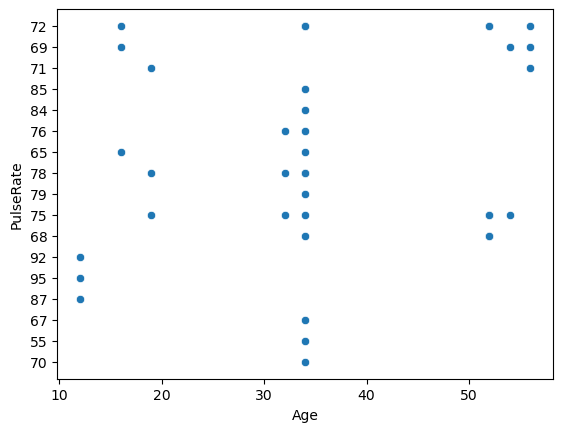

In [73]:
# Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim
sns.scatterplot(x='Age', y='PulseRate', data=df)
plt.show()

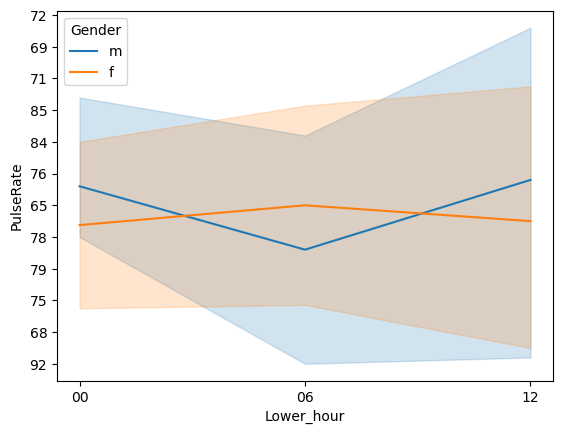

In [74]:
# Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính
sns.lineplot(x='Lower_hour', y='PulseRate', data=df, hue='Gender')
plt.show()